###   Ajay Rao

#                                GLOBAL  TERRORISM  EDA

    Terrorism is defined as “the unlawful use of violence and intimidation, especially against civilians, in the pursuit of political aims.” 
The key problem is that terrorism is difficult to distinguish from other forms of political violence and violent crime, such as state-based armed conflict, non-state conflict, one-sided violence, hate crime, and homicide. The lines between these different forms of violence are often blurry. Here, we take a look at standard criteria of what constitutes terrorism, as well as how it might be distinguished from other forms of violence.
                Despite the innumerable and often-discussed ways in which we are vulnerable to them, terrorist attacks are rare. An attack occurs only when a perpetrator vile enough to commit it, a motive strong enough to rouse him to action, a target germane to the motive, and the wherewithal to act all converge at the same place and time.

## Overview

We will look at:
    1. Some basic Statistics
    2. Countries with Maximum Terror Attacks
    3. Success Rate of Terror Attacks
    4. Terrorist Activities Over the Years
    5. Distribution of Attack Type
    6. Common Targets for the attack
    7. Top 10 Terrorist Groups
    8. Rise/Fall of Terrorist Groups Over the years
    9. Common weapons used by these groups
    10. Number of people affected by these activities.
    11. Terrorism in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

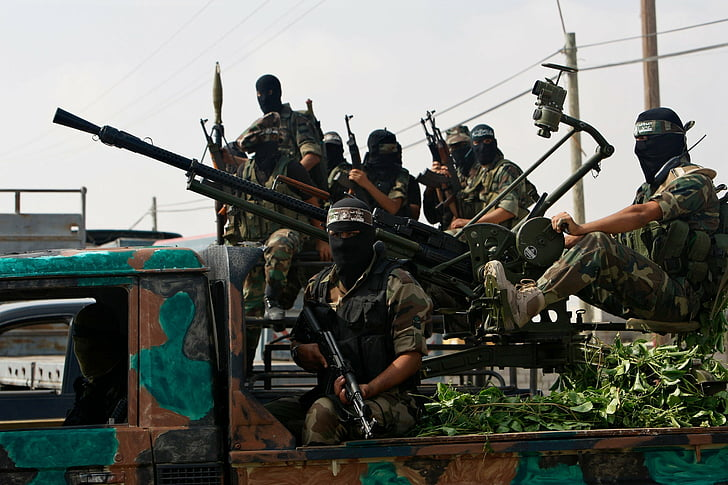

In [2]:
from IPython.display import Image
Image(filename='Terrorism.jpg', width=700)

## Importing the Dataset

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1", engine='python')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 135)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning 

In [8]:
ser = df.isnull().sum()
ser[ser.values>df.shape[0]/2].describe()

count        77.000000
mean     169302.467532
std       18907.329240
min      104310.000000
25%      170149.000000
50%      177628.000000
75%      180917.000000
max      181671.000000
dtype: float64

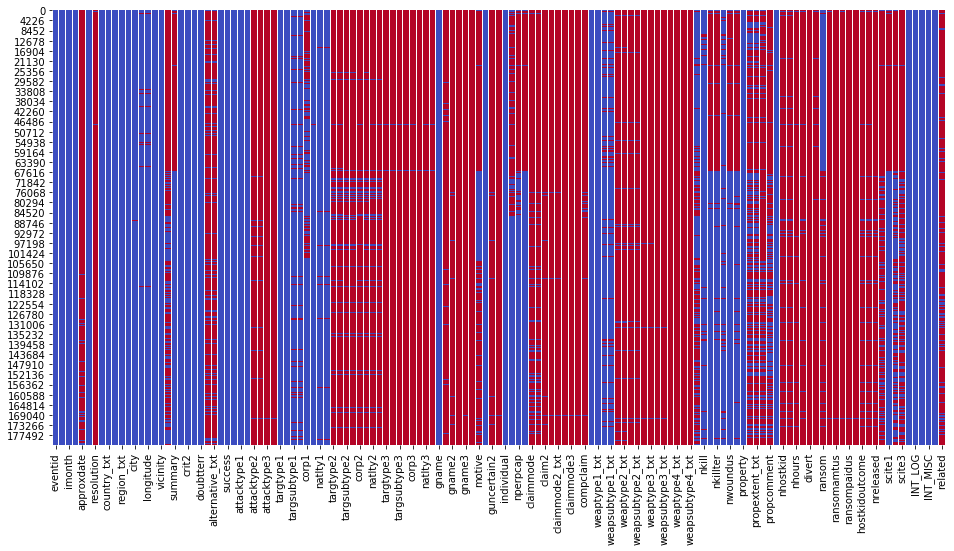

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),cmap='coolwarm',cbar=False)

Red represents NULL values

### Selecting the required columns

In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','natlty1_txt': 'Nationality',
                       'region_txt':'Region','provstate':'State','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df = df[['Year','Month','Day','Country','State','Region','Nationality','city','latitude','longitude','AttackType','Killed',
         'Wounded','Target','Group','success','Target_type','Weapon_type','Motive']]

In [11]:
print(df.shape)
df.head()

(181691, 19)


,Year,Month,Day,Country,State,Region,Nationality,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,success,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,1,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Belgium,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,1,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,United States,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,1,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,United States,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,1,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,United States,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,1,Government (Diplomatic),Incendiary,NaN


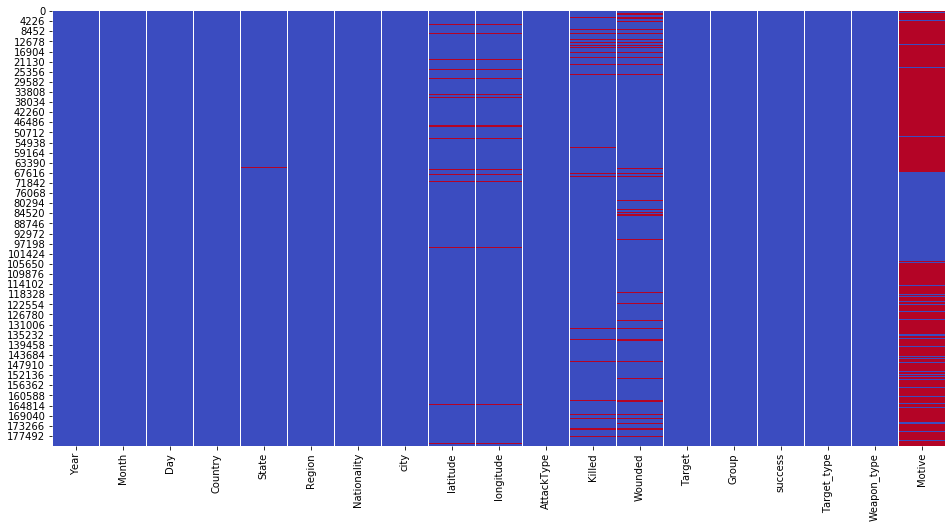

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(),cmap='coolwarm',cbar=False)

In [13]:
df['Nationality'].fillna('Unknown', inplace=True)
df['State'].fillna('Unknown', inplace=True)
#df['city'].fillna('Unknown', inplace=True)

In [14]:
df.dropna(subset=['Killed', 'Wounded', 'longitude', 'latitude'], how='all',inplace=True)

In [15]:
df.shape

(181170, 19)

Cleaned the data successfully

### Basic Statistics: 

In [16]:
print('Country with Highest Terrorist Attacks:', df['Country'].value_counts().index[0], ' Attacks:', df['Country'].value_counts()[0])
print('City with Highest Terrorist Attacks:', df['city'].value_counts().index[1], ' Attacks:', df['city'].value_counts()[1])
print('Region with Highest Terrorist Attacks:', df['Region'].value_counts().index[0], ' Attacks:', df['Region'].value_counts()[0])

Country with Highest Terrorist Attacks: Iraq  Attacks: 24623
City with Highest Terrorist Attacks: Baghdad  Attacks: 7589
Region with Highest Terrorist Attacks: Middle East & North Africa  Attacks: 50391


In [17]:
print('Maximum people killed in an attack:', df['Killed'].max(), 'that took place ', df.loc[df['Killed'].idxmax()].Country, '(', df.loc[df['Killed'].idxmax()].Year, ')')

Maximum people killed in an attack: 1570.0 that took place  Iraq ( 2014 )


# Data Analysis and Visualisation

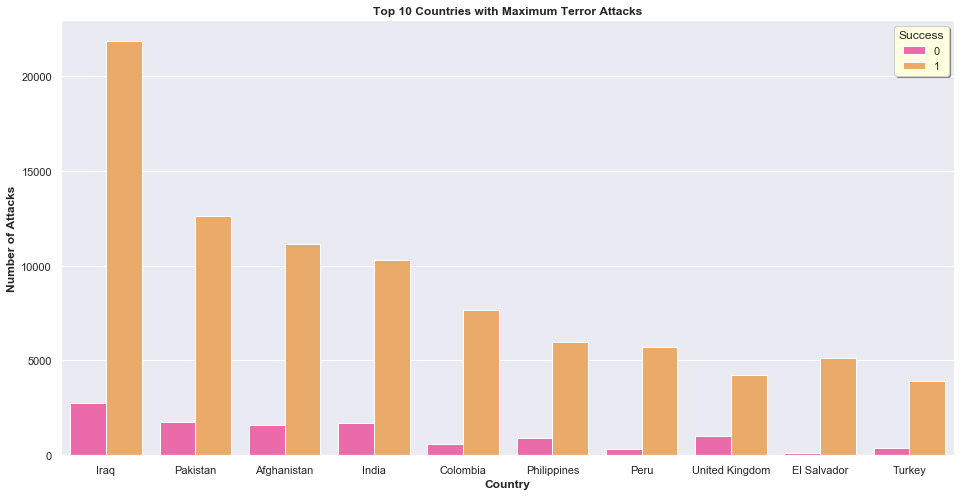

In [18]:
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
sns.countplot(x='Country', hue='success', data=df, order=df['Country'].value_counts().index[:10], palette="spring")
#plt.xscale('log')
plt.ylabel("Number of Attacks", weight='bold')
plt.xlabel("Country", weight='bold')
plt.legend(title='Success', shadow=True, facecolor='lightyellow')
plt.title('Top 10 Countries with Maximum Terror Attacks', weight='bold')
plt.show()

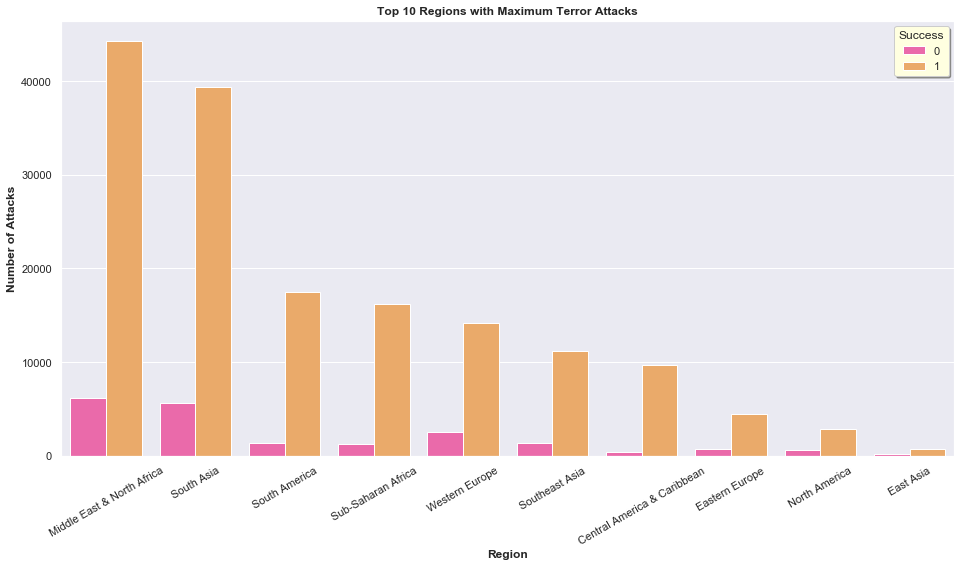

In [19]:
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
sns.countplot(x='Region', hue='success', data=df, order=df['Region'].value_counts().index[:10], palette="spring")
#plt.xscale('log')
plt.ylabel("Number of Attacks", weight='bold')
plt.xlabel("Region", weight='bold')
plt.legend(title='Success', shadow=True, facecolor='lightyellow')
plt.xticks(rotation=30)
plt.title('Top 10 Regions with Maximum Terror Attacks', weight='bold')
plt.show()

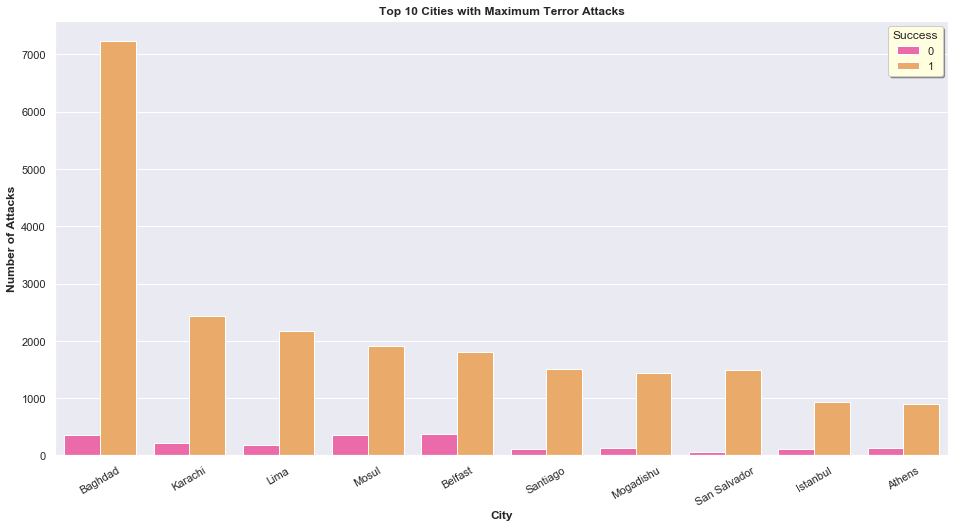

In [20]:
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
sns.countplot(x='city', hue='success', data=df, order=df['city'].value_counts().index[1:11], palette="spring")
#plt.xscale('log')
plt.ylabel("Number of Attacks", weight='bold')
plt.xlabel("City", weight='bold')
plt.legend(title='Success', shadow=True, facecolor='lightyellow')
plt.xticks(rotation=30)
plt.title('Top 10 Cities with Maximum Terror Attacks', weight='bold')
plt.show()

In [21]:
df_temp = pd.DataFrame(df[df['success']==1].groupby(df['Country']).size(), columns=['Successful'])
df_temp['Not_Successful'] = df[df['success']==0].groupby(df['Country']).size()

In [22]:
df_temp.fillna(0, inplace=True)

In [23]:
df_temp.reset_index(inplace=True)

In [24]:
df_temp.head()

,Country,Successful,Not_Successful
0,Afghanistan,11139,1590.0
1,Albania,64,16.0
2,Algeria,2561,182.0
3,Angola,485,13.0
4,Antigua and Barbuda,1,0.0


In [25]:
df_temp['Sucess_Rate'] = df_temp['Successful']/df_temp['Not_Successful']
df_temp.head()

,Country,Successful,Not_Successful,Sucess_Rate
0,Afghanistan,11139,1590.0,7.005660
1,Albania,64,16.0,4.000000
2,Algeria,2561,182.0,14.071429
3,Angola,485,13.0,37.307692
4,Antigua and Barbuda,1,0.0,inf


In [26]:
df_temp2 = df_temp.sort_values(by='Sucess_Rate')[:10]

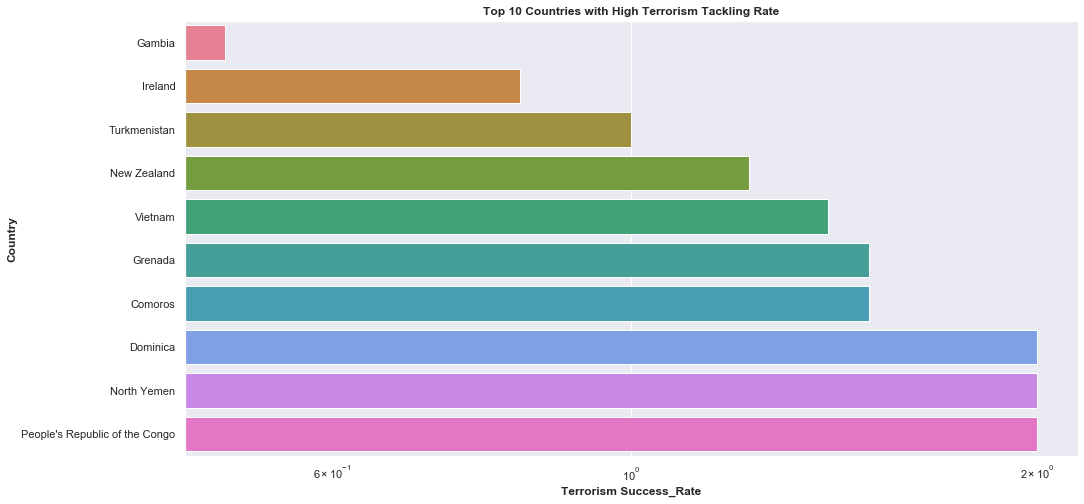

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(y='Country', x='Sucess_Rate', data=df_temp2, palette='husl')

plt.xscale('log')
#plt.xticks(rotation=90)
plt.ylabel('Country', weight='bold')
plt.xlabel('Terrorism Success_Rate', weight='bold')
plt.title('Top 10 Countries with High Terrorism Tackling Rate', weight='bold')
plt.show()

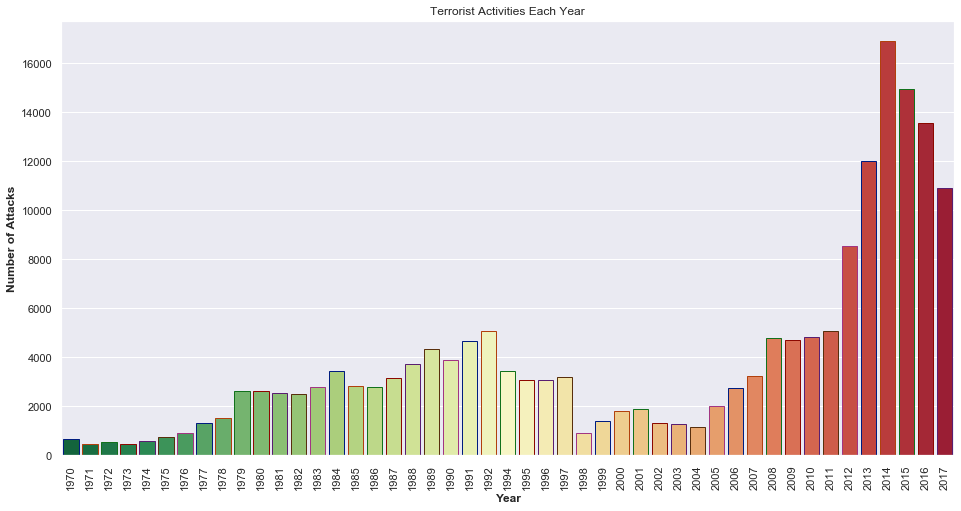

In [28]:
plt.figure(figsize=(16,8))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks', weight='bold')
plt.xlabel('Year', weight='bold')
plt.title('Terrorist Activities Each Year')
plt.show()

In [29]:
ser_temp = df['AttackType'].value_counts()

In [30]:
#Considering top Attack Types
ser_temp['Other'] = ser_temp[ser_temp[:] <= 10000].sum()
ser_temp

Bombing/Explosion                      88105
Armed Assault                          42459
Assassination                          19308
Hostage Taking (Kidnapping)            11060
Facility/Infrastructure Attack         10327
Unknown                                 7251
Unarmed Assault                         1014
Hostage Taking (Barricade Incident)      989
Hijacking                                657
Other                                   9911
Name: AttackType, dtype: int64

In [31]:
ser_temp.drop(ser_temp[ser_temp[:] <= 10000].index, inplace=True)
ser_temp

Bombing/Explosion                 88105
Armed Assault                     42459
Assassination                     19308
Hostage Taking (Kidnapping)       11060
Facility/Infrastructure Attack    10327
Name: AttackType, dtype: int64

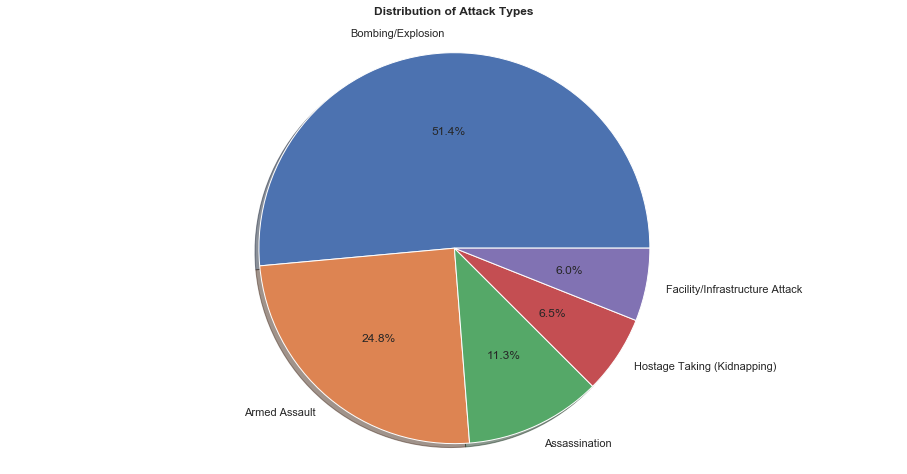

In [32]:
plt.figure(figsize=(16,8))
plt.pie(ser_temp.tolist(), labels=ser_temp.index.tolist(), autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Distribution of Attack Types\n', weight='bold')
plt.axis('equal')
plt.show()

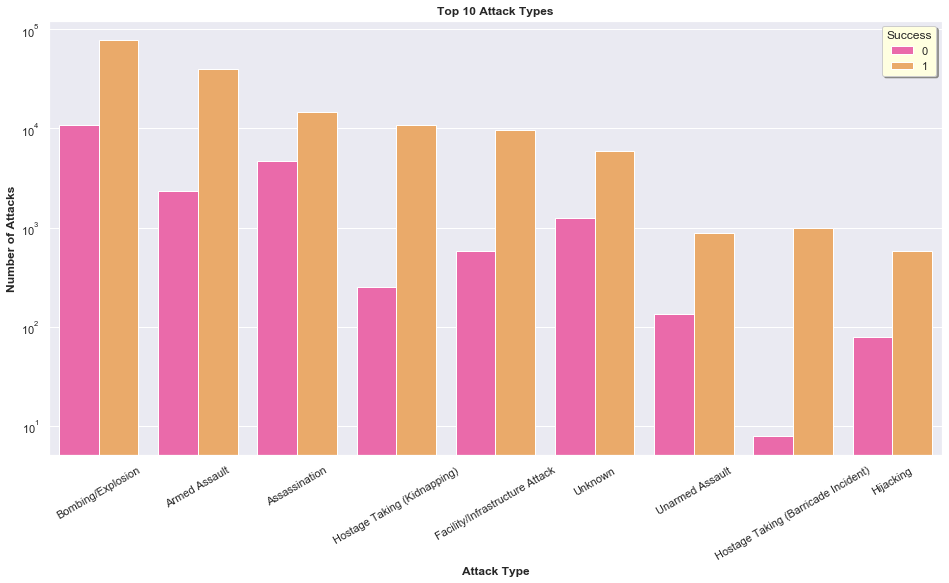

In [33]:
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
sns.countplot(x='AttackType', hue='success', data=df, order=df['AttackType'].value_counts().index, palette="spring")
plt.yscale('log')
plt.ylabel("Number of Attacks", weight='bold')
plt.xlabel("Attack Type", weight='bold')
plt.legend(title='Success', shadow=True, facecolor='lightyellow')
plt.xticks(rotation=30)
plt.title('Top 10 Attack Types', weight='bold')
plt.show()

In [34]:
ser_temp = df['Target_type'].value_counts()

In [35]:
ser_temp['Others'] = ser_temp[ser_temp[:] <= 20000].sum()

In [36]:
ser_temp.drop(ser_temp[ser_temp[:] <= 20000].index, inplace=True)
ser_temp

Private Citizens & Property    43435
Military                       27810
Police                         24484
Government (General)           21253
Business                       20606
Others                         43582
Name: Target_type, dtype: int64

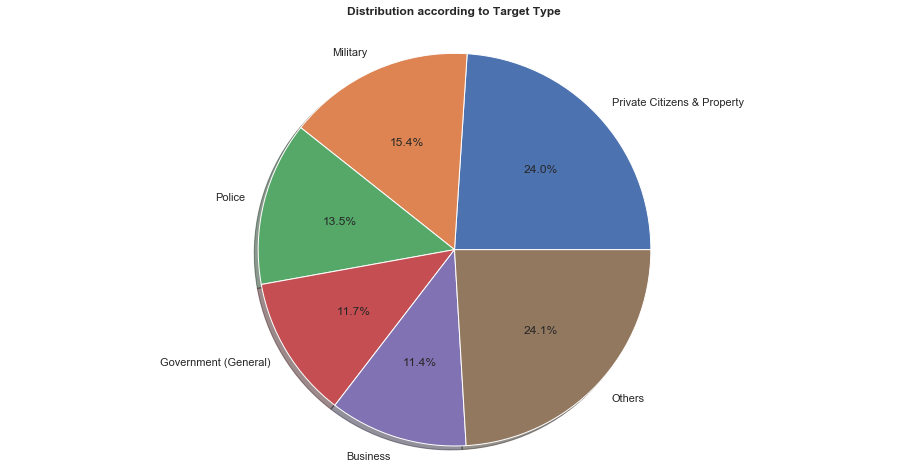

In [37]:
plt.figure(figsize=(16,8))
plt.pie(ser_temp.tolist(), labels=ser_temp.index.tolist(), autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Distribution according to Target Type\n', weight='bold')
plt.axis('equal')
plt.show()

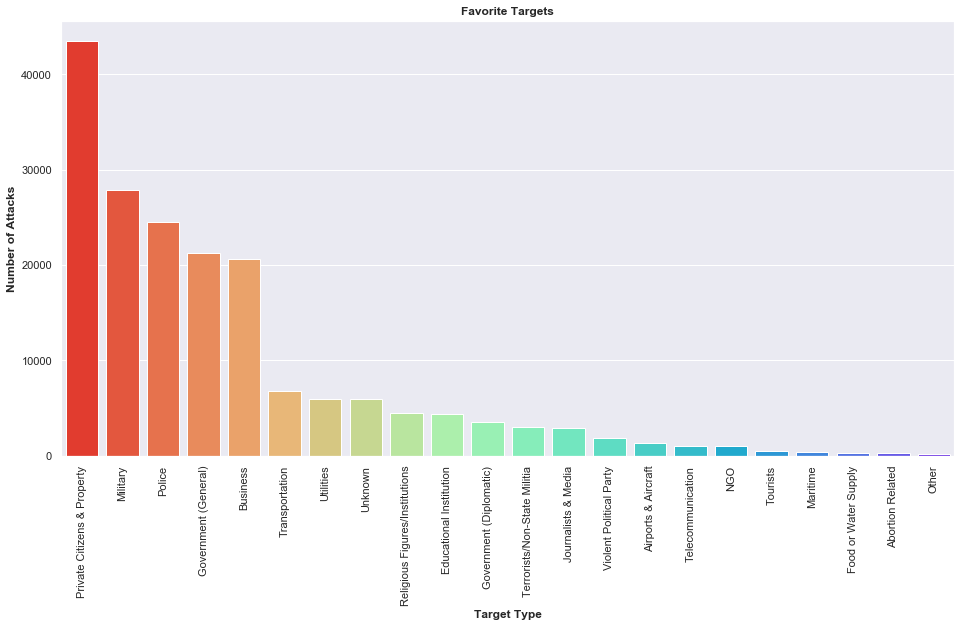

In [38]:
plt.figure(figsize=(16,8))
sns.countplot(df['Target_type'],palette='rainbow_r',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type', weight='bold')
plt.ylabel('Number of Attacks', weight='bold')
plt.title('Favorite Targets', weight='bold')
plt.show()

In [39]:
df.Group.value_counts()[:10]

Unknown                                             82679
Taliban                                              7476
Islamic State of Iraq and the Levant (ISIL)          5608
Shining Path (SL)                                    4539
Al-Shabaab                                           3285
Farabundo Marti National Liberation Front (FMLN)     3280
New People's Army (NPA)                              2765
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2463
Boko Haram                                           2418
Name: Group, dtype: int64

In [40]:
top10 = df.groupby('Group')['Year'].count().nlargest(11).index

In [41]:
top10

Index(['Unknown', 'Taliban', 'Islamic State of Iraq and the Levant (ISIL)',
       'Shining Path (SL)', 'Al-Shabaab',
       'Farabundo Marti National Liberation Front (FMLN)',
       'New People's Army (NPA)', 'Irish Republican Army (IRA)',
       'Revolutionary Armed Forces of Colombia (FARC)', 'Boko Haram',
       'Kurdistan Workers' Party (PKK)'],
      dtype='object', name='Group')

In [42]:
df_top10 = df[df['Group'].isin(top10)]

In [43]:
df_top10 = df_top10[~(df_top10['Group']=='Unknown')]

In [44]:
groupYear = pd.crosstab(df_top10.Year, df_top10.Group)
groupYear.head()

Group,Al-Shabaab,Boko Haram,Farabundo Marti National Liberation Front (FMLN),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),New People's Army (NPA),Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Taliban
Year,,,,,,,,,,
1970,0,0,0,7,0,0,2,0,0,0
1971,0,0,0,60,0,0,1,0,0,0
1972,0,0,0,162,0,0,0,0,0,0
1973,0,0,0,111,0,0,0,0,0,0
1974,0,0,0,113,0,0,0,0,0,0


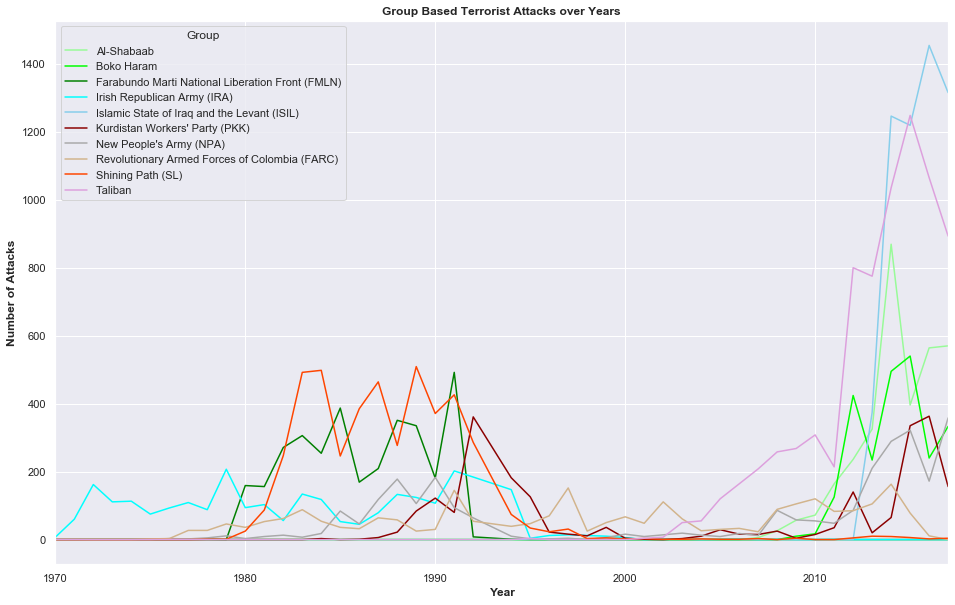

In [45]:
color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 'orangered', 'plum', 'salmon', 'mistyrose']
groupYear.plot(figsize=(16, 10), color=color_list_reg_yr)
plt.xlabel('Year', weight='bold')
plt.ylabel('Number of Attacks', weight='bold')
plt.title('Group Based Terrorist Attacks over Years', weight='bold')
plt.show()

In [46]:
df_temp = pd.DataFrame(df_top10[df_top10['success']==1].groupby(df_top10['Group']).size(), columns=['Successful'])
df_temp['Not_Successful'] = df_top10[df_top10['success']==0].groupby(df_top10['Group']).size()

In [47]:
df_temp.reset_index(inplace=True)

In [48]:
df_temp

,Group,Successful,Not_Successful
0,Al-Shabaab,3013,272
1,Boko Haram,2247,171
2,Farabundo Marti National Liberation Front (FMLN),3246,34
3,Irish Republican Army (IRA),2282,389
4,Islamic State of Iraq and the Levant (ISIL),4754,854
5,Kurdistan Workers' Party (PKK),2173,135
6,New People's Army (NPA),2450,315
7,Revolutionary Armed Forces of Colombia (FARC),2278,185
8,Shining Path (SL),4321,218
9,Taliban,6678,798


In [49]:
df_temp['Total_Attacks'] = df_temp['Successful'] + df_temp['Not_Successful']

In [50]:
ser1 = df_top10['Killed'].groupby(df_top10['Group']).sum()

In [51]:
ser2 = df_top10['Wounded'].groupby(df_top10['Group']).sum()

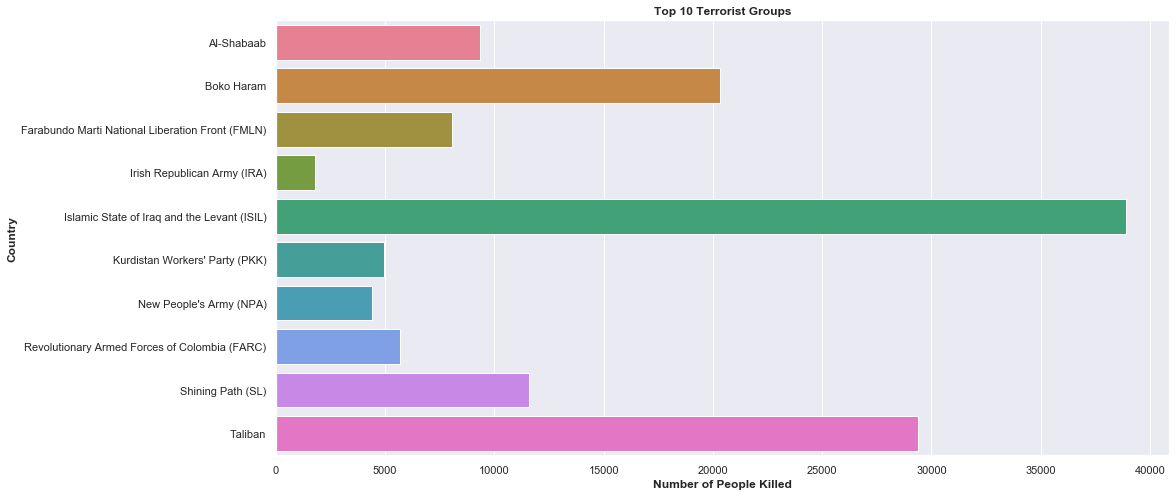

In [52]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(y=ser1.index.tolist(), x=ser1.tolist(), palette='husl')

#plt.xscale('log')
#plt.xticks(rotation=90)
plt.ylabel('Country', weight='bold')
plt.xlabel('Number of People Killed', weight='bold')
plt.title('Top 10 Terrorist Groups', weight='bold')
plt.show()

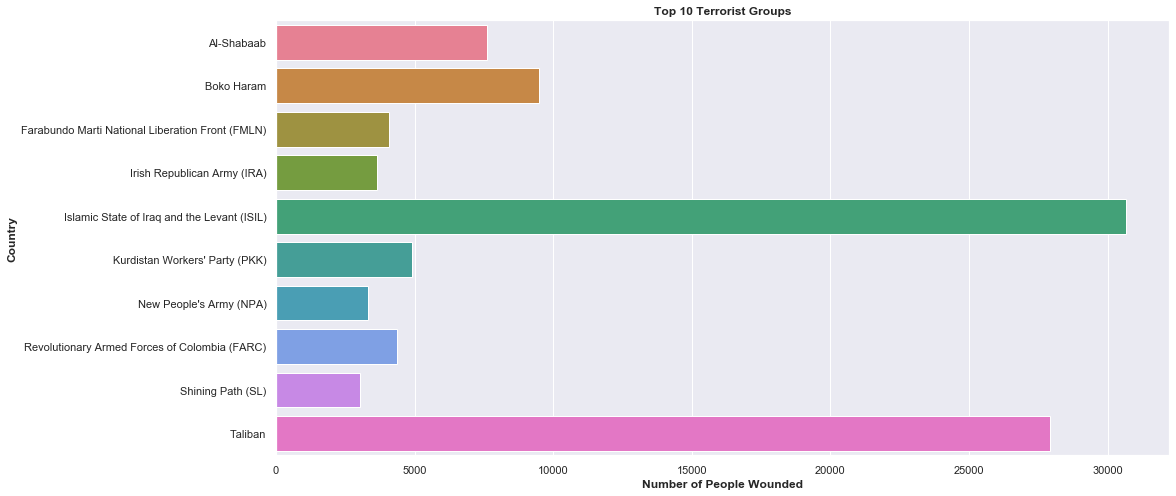

In [53]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(y=ser2.index.tolist(), x=ser2.tolist(), palette='husl')

#plt.xscale('log')
#plt.xticks(rotation=90)
plt.ylabel('Country', weight='bold')
plt.xlabel('Number of People Wounded', weight='bold')
plt.title('Top 10 Terrorist Groups', weight='bold')
plt.show()

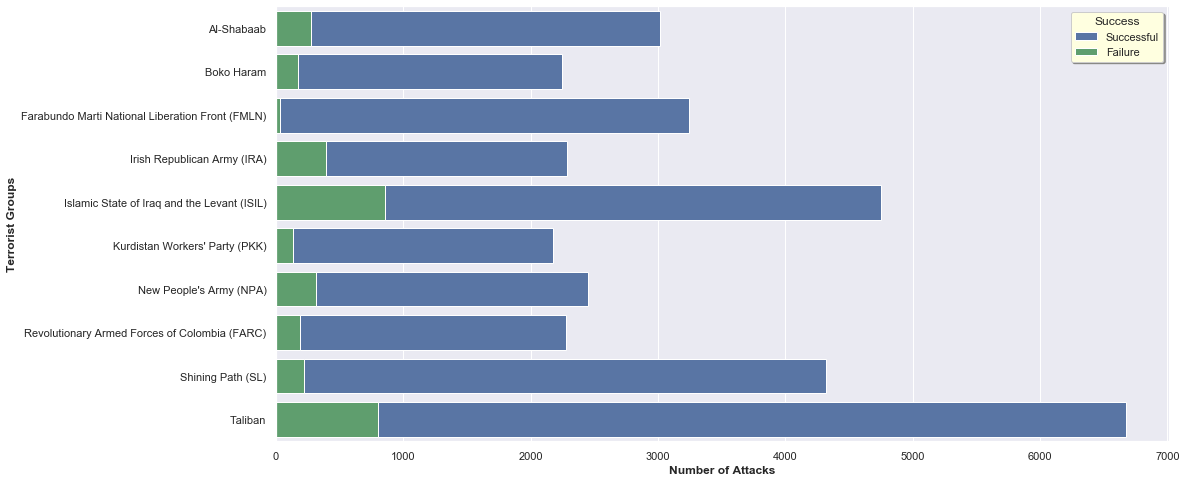

In [54]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(y='Group', x='Successful', data=df_temp, color='b', label='Successful')
sns.barplot(y='Group', x='Not_Successful', data=df_temp, color='g', label='Failure')
#plt.yscale('log')
#plt.xticks(rotation=90)
plt.ylabel('Terrorist Groups', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.legend(title='Success', shadow=True, facecolor='lightyellow')
plt.show()

Text(0, 0.5, 'Terrorist Group')

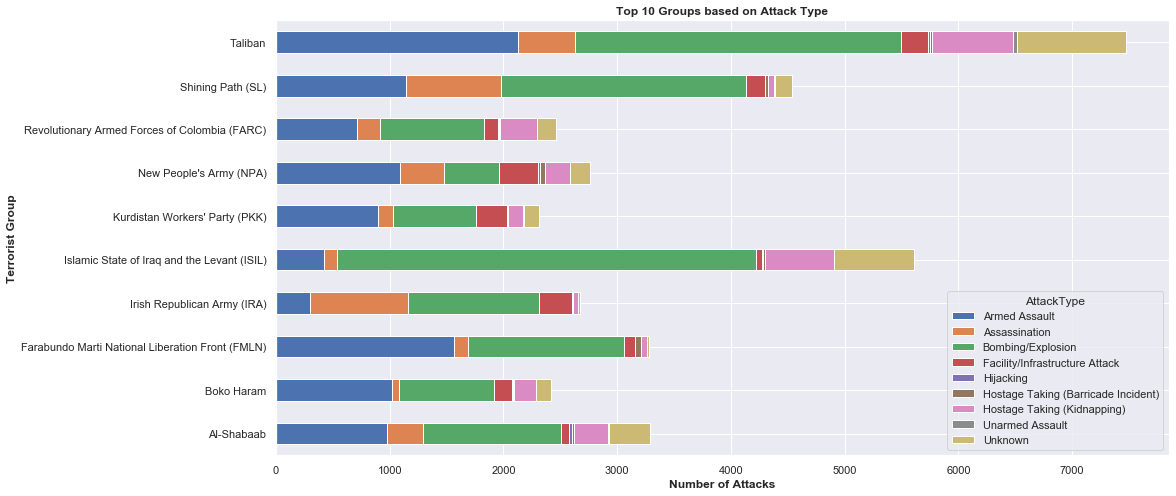

In [55]:
pd.crosstab(df_top10['Group'],df_top10['AttackType']).plot.barh(stacked=True, figsize=(16,8))
plt.title('Top 10 Groups based on Attack Type', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.ylabel('Terrorist Group', weight='bold')

Text(0, 0.5, 'Terrorist Group')

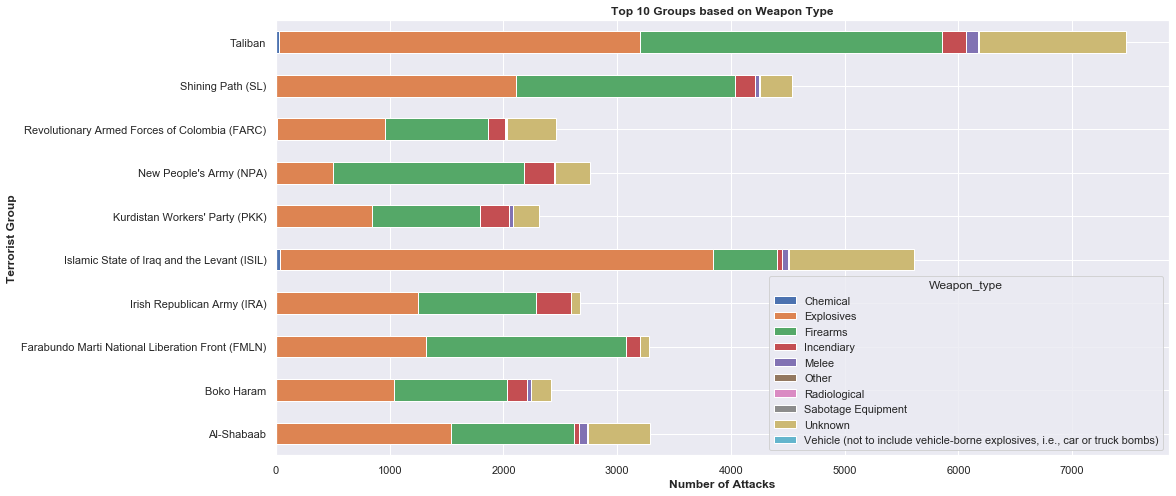

In [56]:
pd.crosstab(df_top10['Group'],df_top10['Weapon_type']).plot.barh(stacked=True, figsize=(16,8))
plt.title('Top 10 Groups based on Weapon Type', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.ylabel('Terrorist Group', weight='bold')

In [57]:
ser1 = df['Nationality'].value_counts()

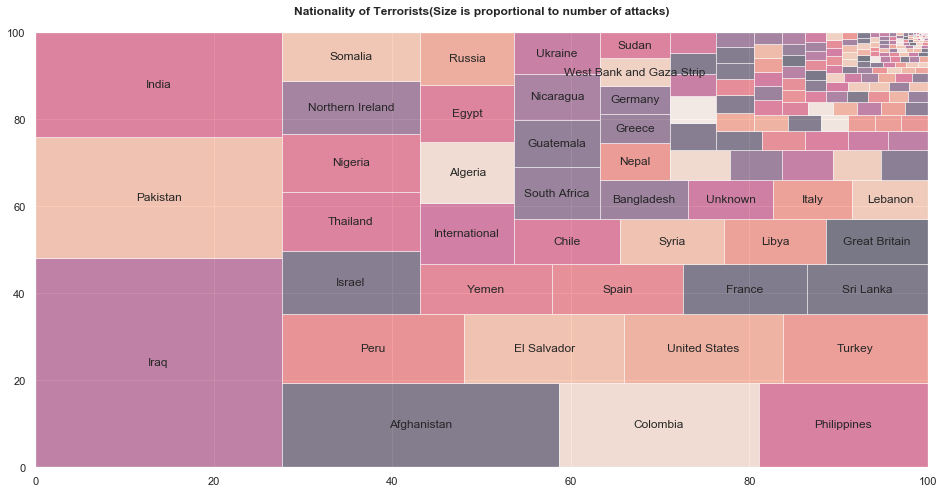

In [58]:
plt.figure(figsize=(16,8))
squarify.plot(sizes=ser1.tolist(), label=ser1.index.tolist()[:40],alpha=0.5)
plt.title('Nationality of Terrorists(Size is proportional to number of attacks)\n', weight='bold')
plt.show()

In [59]:
world_map = gpd.read_file('TM_WORLD_BORDERS-0.3.shp')

In [60]:
crs = {'init':'epsg:4326'}

In [61]:
geometry = [Point(xy) for xy in zip(df_top10['longitude'], df_top10['latitude'])]

In [62]:
geo_df = gpd.GeoDataFrame(df_top10, crs=crs, geometry=geometry)
geo_df.head()

,Year,Month,Day,Country,State,Region,Nationality,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,success,Target_type,Weapon_type,Motive,geometry
39,1970,1,31,Philippines,Tarlac,Southeast Asia,United States,Bamban,15.675051,120.331618,Unknown,0.0,1.0,Seaman,New People's Army (NPA),0,Military,Unknown,NaN,POINT (120.33162 15.67505)
169,1970,4,2,Philippines,Pampanga,Southeast Asia,United States,Mabalacat City,15.185916,120.541870,Unknown,2.0,0.0,Airmen,New People's Army (NPA),1,Military,Unknown,NaN,POINT (120.54187 15.18592)
364,1970,6,26,United Kingdom,Northern Ireland,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,Armed Assault,5.0,NaN,"3 IRA members, 2 civilians",Irish Republican Army (IRA),0,Terrorists/Non-State Militia,Incendiary,NaN,POINT (-7.31204 55.01156)
365,1970,6,27,United Kingdom,Northern Ireland,Western Europe,Northern Ireland,Londonderry,55.011562,-7.312045,Armed Assault,3.0,NaN,"William Kincaid, 28, Daniel Loughins, 32 and A...",Irish Republican Army (IRA),1,Private Citizens & Property,Firearms,NaN,POINT (-7.31204 55.01156)
366,1970,6,27,United Kingdom,Northern Ireland,Western Europe,Northern Ireland,Belfast,54.607712,-5.956210,Armed Assault,1.0,NaN,"Robert Neill, 38, protestant",Irish Republican Army (IRA),1,Private Citizens & Property,Firearms,NaN,POINT (-5.95621 54.60771)


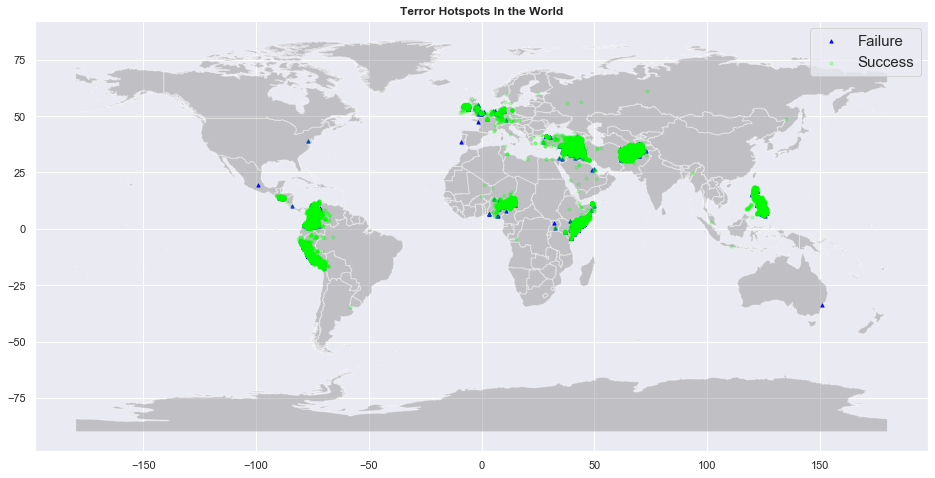

In [63]:
fig, ax = plt.subplots(figsize=(16,8))
world_map.plot(ax=ax, alpha=0.4, color = 'grey')
geo_df[geo_df['success']==0].plot(ax=ax, markersize=10, color='blue', alpha=0.9, marker='^', label='Failure')
geo_df[geo_df['success']==1].plot(ax=ax, markersize=10, color='lime', alpha=0.2, marker='o', label='Success')
plt.title('Terror Hotspots In the World', weight='bold')
plt.legend(prop={'size':15})


## Terrorism in India 

In [64]:
df_India=df[df['Country']=='India']

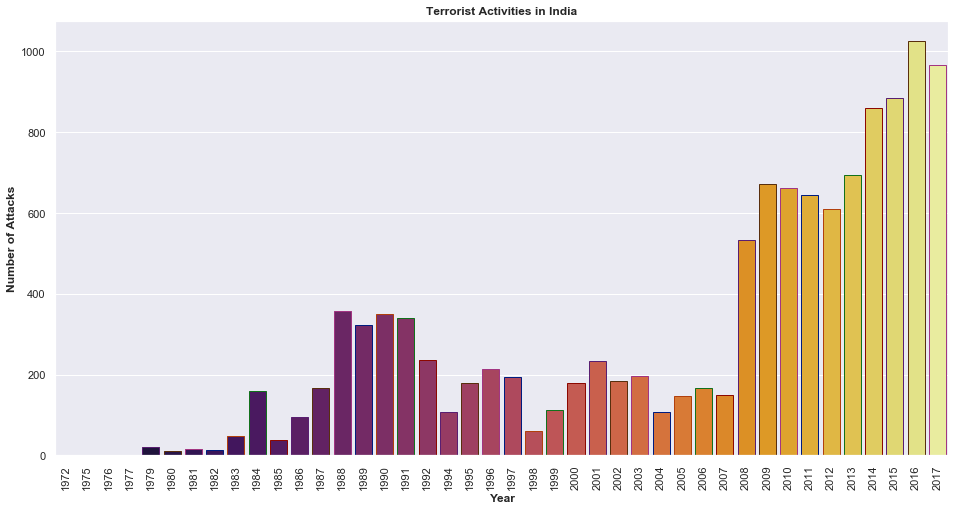

In [65]:
plt.figure(figsize=(16,8))
sns.countplot('Year',data=df_India,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks', weight='bold')
plt.xlabel('Year', weight='bold')
plt.title('Terrorist Activities in India', weight='bold')
plt.show()

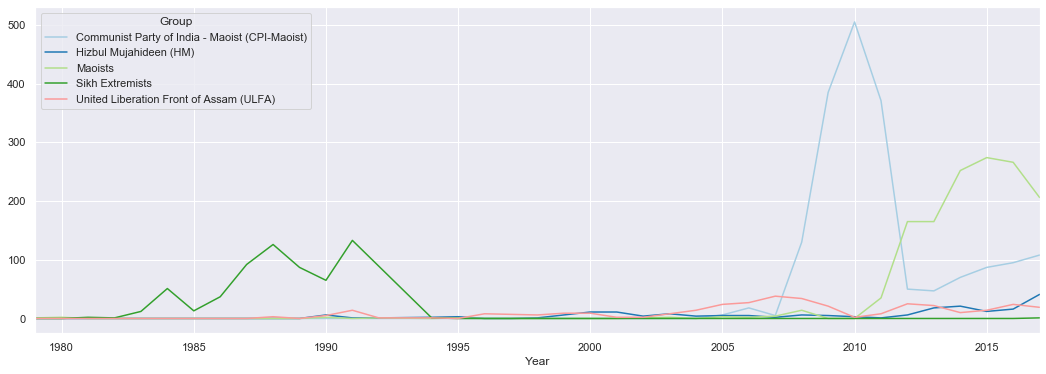

In [66]:
pd.crosstab(df_India[df_India['Group'].isin(df_India['Group'].value_counts()[1:6].index)]['Year'],
            df_India[df_India['Group'].isin(df_India['Group'].value_counts()[1:6].index)]['Group']).plot(color=sns.color_palette('Paired',10),figsize=(18,6))

In [67]:
ser1 = df_India['Target_type'].value_counts()[:10]

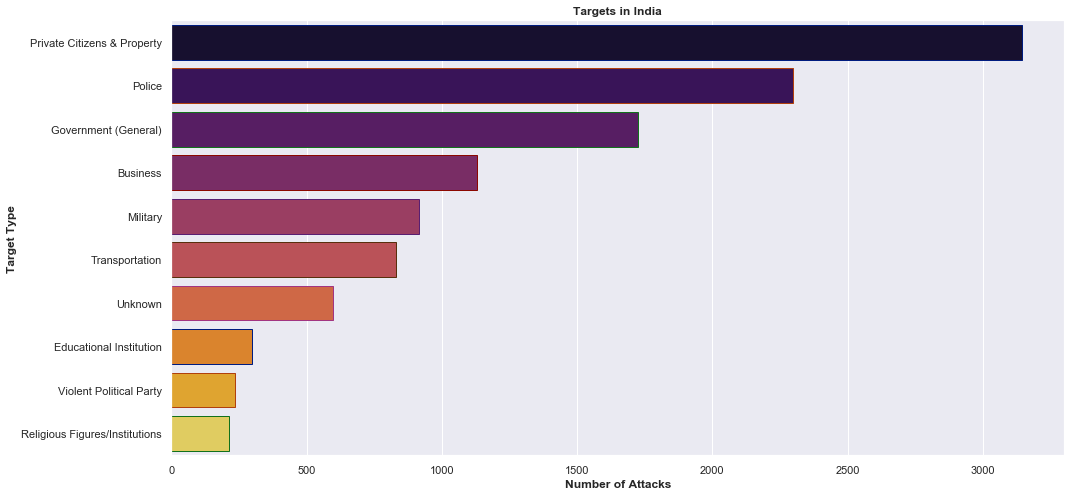

In [68]:
plt.figure(figsize=(16,8))
sns.barplot(ser1.tolist(),ser1.index.tolist(),palette='inferno',edgecolor=sns.color_palette('dark',7))
#plt.xticks(rotation=90)
plt.ylabel('Target Type', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.title('Targets in India', weight='bold')
plt.show()

In [69]:
india_map = gpd.read_file('Igismap(1)\Indian_States.shp')

In [70]:
top10 = df_India.groupby('Group')['Year'].count().nlargest(11).index
top10[1:10]

Index(['Communist Party of India - Maoist (CPI-Maoist)', 'Maoists',
       'Sikh Extremists', 'United Liberation Front of Assam (ULFA)',
       'Hizbul Mujahideen (HM)', 'Lashkar-e-Taiba (LeT)',
       'National Democratic Front of Bodoland (NDFB)',
       'Garo National Liberation Army', 'Muslim Separatists'],
      dtype='object', name='Group')

In [71]:
df_top10India = df_India[df_India['Group'].isin(top10)]
df_top10India = df_top10India[~(df_top10India['Group']=='Unknown')]

In [72]:
geometry = [Point(xy) for xy in zip(df_top10India['longitude'], df_top10India['latitude'])]
geo_df = gpd.GeoDataFrame(df_top10India, crs=crs, geometry=geometry)
geo_df.head()

,Year,Month,Day,Country,State,Region,Nationality,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,success,Target_type,Weapon_type,Motive,geometry
9809,1979,12,12,India,Manipur,South Asia,India,Unknown,24.663717,93.906269,Assassination,1.0,0.0,"Ranbi Singh, Speaker of Legislative Assembly",Maoists,1,Government (General),Unknown,NaN,POINT (93.90627 24.66372)
9918,1980,1,1,India,Manipur,South Asia,India,Imphal,24.798346,93.940430,Assassination,1.0,0.0,Communist Politician,Maoists,1,Government (General),Unknown,NaN,POINT (93.94043 24.79835)
9964,1980,1,9,India,Manipur,South Asia,India,Unknown,24.663717,93.906269,Armed Assault,2.0,4.0,Residence of Former State Minister,Maoists,1,Government (General),Firearms,NaN,POINT (93.90627 24.66372)
14447,1981,9,29,India,Delhi,South Asia,India,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,NaN,Sikh Extremists,1,Airports & Aircraft,Firearms,NaN,POINT (77.15334 28.58584)
14552,1981,10,16,India,Chandigarh,South Asia,India,Chandigarh,30.733315,76.779418,Assassination,1.0,2.0,Niranjan Dingh/brother of Joint Secretary (wou...,Sikh Extremists,1,Government (General),Firearms,NaN,POINT (76.77942 30.73332)


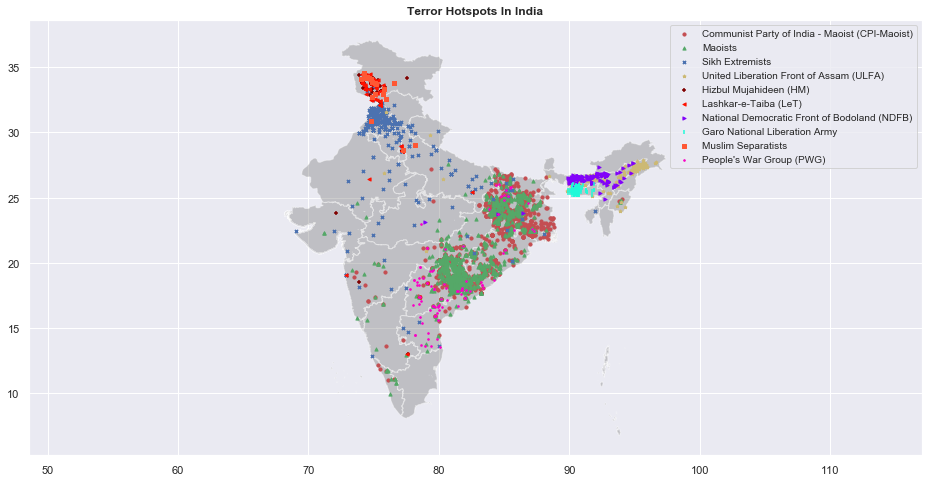

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
india_map.plot(ax=ax, alpha=0.4, color = 'grey')
marker = ['o', '^', 'x', '*', '+', '<', '>', '|', ',', '.']
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6']
for i in range(len(marker)):        
    geo_df[geo_df['Group']==geo_df['Group'].value_counts().index[i]].plot(ax=ax, markersize=10, color=colors[i], marker=marker[i], label=geo_df['Group'].value_counts().index[i])
    
plt.title('Terror Hotspots In India', weight='bold')
plt.axis('equal')
plt.legend(prop={'size':10})

In [75]:
df_temp = df_India[(df_India['Year']==2014)]
ser1 = df_temp['Killed'].groupby(df_temp['State']).sum()
ser1.sort_values(ascending=False, inplace=True)

df_temp1 = df_India[(df_India['Year']==2015)]
ser2 = df_temp1['Killed'].groupby(df_temp1['State']).sum()
ser2.sort_values(ascending=False, inplace=True)

df_temp2 = df_India[(df_India['Year']==2016)]
ser3 = df_temp2['Killed'].groupby(df_temp2['State']).sum()
ser3.sort_values(ascending=False, inplace=True)

df_temp3 = df_India[(df_India['Year']==2017)]
ser4 = df_temp3['Killed'].groupby(df_temp3['State']).sum()
ser4.sort_values(ascending=False, inplace=True)



In [77]:
df_temp = ser1.to_frame().join(ser2, lsuffix='_2014', rsuffix='_2015').join(ser3).join(ser4, lsuffix='_2016', rsuffix='_2017')
print('\tStats of People Killed during last 4 years')
df_temp

	Stats of People Killed during last 4 years


,Killed_2014,Killed_2015,Killed_2016,Killed_2017
State,,,,
Assam,109.0,12.0,32.0,9.0
Chhattisgarh,96.0,121.0,100.0,108.0
Jammu and Kashmir,92.0,67.0,126.0,144.0
Jharkhand,46.0,14.0,44.0,28.0
Odisha,34.0,22.0,23.0,27.0
Manipur,26.0,46.0,22.0,27.0
Maharashtra,21.0,18.0,13.0,13.0
Meghalaya,18.0,16.0,5.0,2.0
Bihar,16.0,9.0,43.0,25.0


In [79]:
df_temp = ser1.to_frame().join(ser2, lsuffix='_2014', rsuffix='_2015').join(ser3).join(ser4, lsuffix='_2016', rsuffix='_2017')
df_temp = df_temp[:10]
df_temp.reset_index(inplace=True)
df_temp

,State,Killed_2014,Killed_2015,Killed_2016,Killed_2017
0,Assam,109.0,12.0,32.0,9.0
1,Chhattisgarh,96.0,121.0,100.0,108.0
2,Jammu and Kashmir,92.0,67.0,126.0,144.0
3,Jharkhand,46.0,14.0,44.0,28.0
4,Odisha,34.0,22.0,23.0,27.0
5,Manipur,26.0,46.0,22.0,27.0
6,Maharashtra,21.0,18.0,13.0,13.0
7,Meghalaya,18.0,16.0,5.0,2.0
8,Bihar,16.0,9.0,43.0,25.0
9,West Bengal,10.0,2.0,7.0,1.0


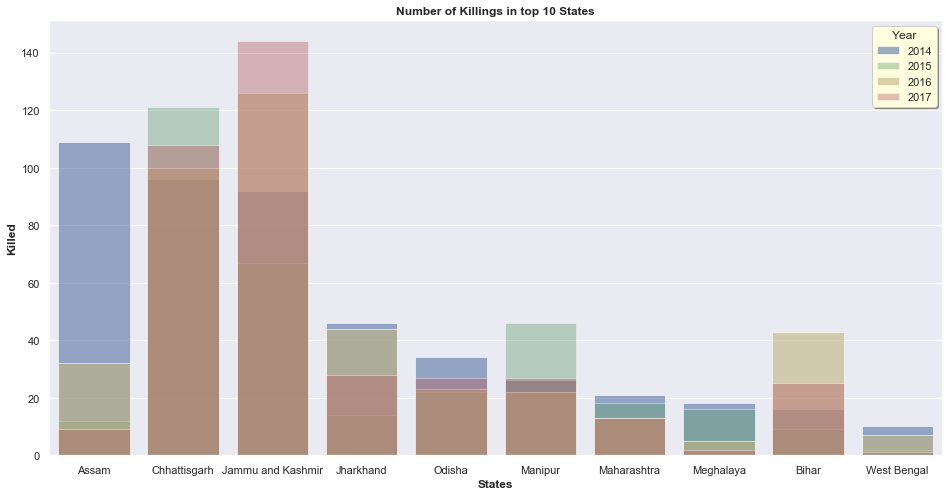

In [80]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
sns.barplot(y='Killed_2014', x='State', data=df_temp, alpha=.6, color='b', label='2014')
sns.barplot(y='Killed_2015', x='State', data=df_temp, alpha=.4, color='g', label='2015')
sns.barplot(y='Killed_2016', x='State', data=df_temp, alpha=.6, color='y', label='2016')
sns.barplot(y='Killed_2017', x='State', data=df_temp, alpha=.4, color='r', label='2017')
#plt.yscale('log')
#plt.xticks(rotation=90)
plt.ylabel('Killed', weight='bold')
plt.xlabel('States', weight='bold')
plt.legend(title='Year', shadow=True, facecolor='lightyellow')
plt.title('Number of Killings in top 10 States', weight='bold')
plt.show()

## Summary

1. In India, Jammu and Kashmir saw increase in terror activities over the years.(till 2017)
2. During the last 4 years, Union Territories including Puducherry, Delhi, Chandigarh have seen very low terror activities.
3. Terror Group:ISIL has incresed its activities significantly over the years.
4. In India, Sikh Extremists' activities is totally under control.
5. Gambia and Ireland have completely tackled high terrorist activities.(due to low terror activities)
6. Hostage target type activities saw a significant rise till 2010.
7. Taliban activities saw maximum casualities and usage of high amount of explosives.
